In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import validation_curve
import warnings
warnings.filterwarnings(action='ignore')
from sklearn.model_selection import cross_val_score

In [2]:
from auxiliary_files.auxiliary_plots import * 
from auxiliary_files.auxiliary_analysis import * 
from auxiliary_files.auxiliary_tables import *

In [3]:
np.random.seed(135)

n = 30
p = 35
true_betas = generate_true_betas([10], [25], 2)
cor_factor = 0
iterations = 500
alphas = np.logspace(-4,1,200)


y_test, X_test, df_test= get_sim_data(n, p, cor_factor, true_betas[0])

df_predictions_1 = get_predictions(n, p, true_betas[0], cor_factor, iterations, alphas, X_test)
store_mse_1, store_variance_1, store_bias_sq_1 = compute_mse(df_predictions_1, y_test, iterations)

y_train, X_train, df_train = get_sim_data(n, p, cor_factor, true_betas[0])  

In [4]:
# ridge CV-10

train_scores_ridge, val_scores_ridge = validation_curve(Ridge(),
                                  X_train, y_train, param_name="alpha", param_range=alphas,
                                  cv=10, scoring='neg_mean_squared_error')
train_scores_ridge = -(train_scores_ridge)
val_scores_ridge = -(val_scores_ridge)
val_mean_ridge = np.mean(val_scores_ridge, axis=1)
val_std_ridge = np.std(val_scores_ridge, axis=1)

In [5]:
# ridge LOOCV

train_scores_ridge_loo, val_scores_ridge_loo = validation_curve(Ridge(),
                                  X_train, y_train, param_name="alpha", param_range=alphas,
                                  cv=n, scoring='neg_mean_squared_error')
train_scores_ridge_loo = -(train_scores_ridge_loo)
val_scores_ridge_loo = -(val_scores_ridge_loo)
val_mean_ridge_loo = np.mean(val_scores_ridge_loo, axis=1)
val_std_ridge_loo = np.std(val_scores_ridge_loo, axis=1)

In [6]:
# lasso CV-10

train_scores_lasso, val_scores_lasso = validation_curve(Lasso(),
                                  X_train, y_train, param_name="alpha", param_range=alphas,
                                  cv=10, scoring='neg_mean_squared_error')
train_scores_lasso = -(train_scores_lasso)
val_scores_lasso = -(val_scores_lasso)
val_mean_lasso = np.mean(val_scores_lasso, axis=1)
val_std_lasso = np.std(val_scores_lasso, axis=1)

In [7]:
# lasso LOOCV

train_scores_lasso_loo, val_scores_lasso_loo = validation_curve(Lasso(),
                                  X_train, y_train, param_name="alpha", param_range=alphas,
                                  cv=n, scoring='neg_mean_squared_error')
train_scores_lasso_loo = -(train_scores_lasso_loo)
val_scores_lasso_loo = -(val_scores_lasso_loo)
val_mean_lasso_loo = np.mean(val_scores_lasso_loo, axis=1)
val_std_lasso_loo = np.std(val_scores_lasso_loo, axis=1)

In [8]:
for i in store_mse_1: 
    
    print(min(i), np.argmin(i))

11.548110458714607 156
6.345191082299678 110
9.548061228568843 13
8.901101002409984 100
7.814855815966139 105


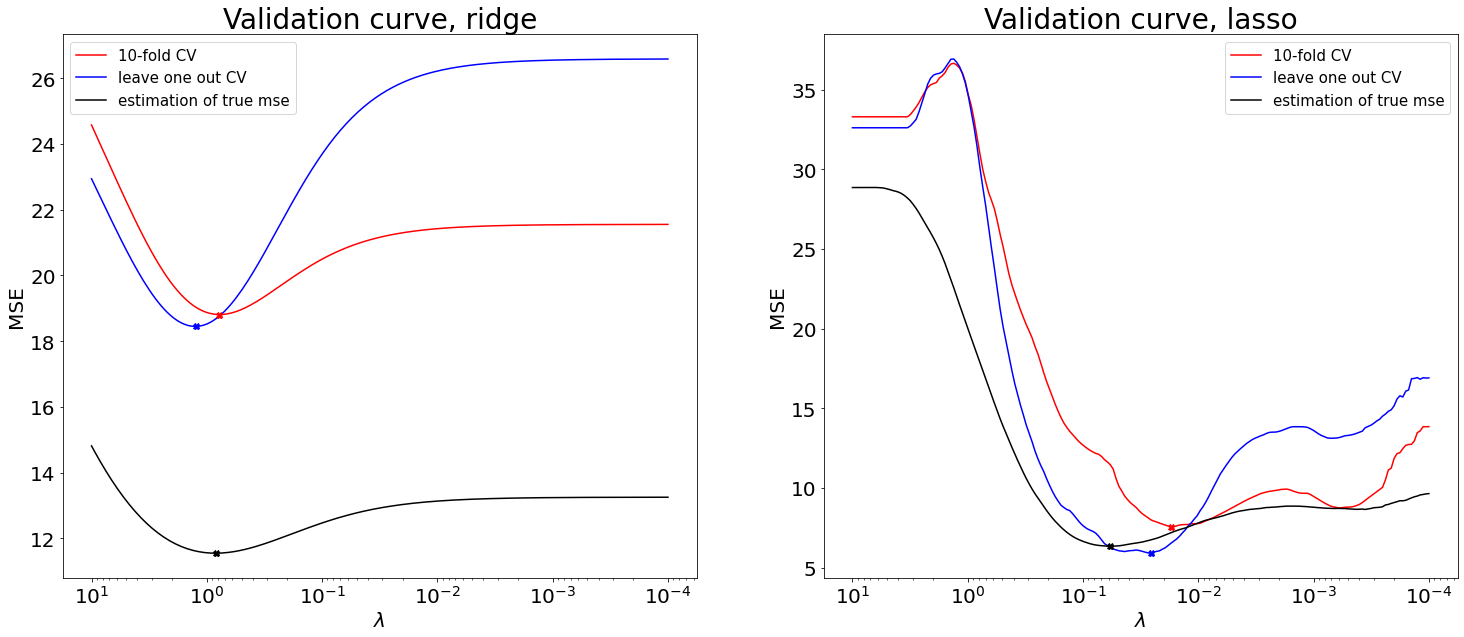

In [9]:
plt.figure(figsize = (25,10))

plt.subplot(1, 2, 1)
ax = plt.gca()
ax.plot(alphas, val_mean_ridge, color="red", label = "10-fold CV") # CV average ridge 10-fold
ax.plot(alphas, val_mean_ridge_loo, color="blue", label = "leave one out CV") # CV average ridge leave one out
ax.plot(alphas, store_mse_1[0], color="black", label = "estimation of true mse") # true ridge
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1]) 
minimum_10_cv_ridge = [alphas[np.argmin(val_mean_ridge)], np.min(val_mean_ridge)]
minimum_loo_ridge = [alphas[np.argmin(val_mean_ridge_loo)], np.min(val_mean_ridge_loo)]
minimum_mse_true_ridge = [alphas[np.argmin(store_mse_1[0])], np.min(store_mse_1[0])]
ax.plot(*minimum_10_cv_ridge, "X", color="red")
ax.plot(*minimum_loo_ridge, "X", color="blue")
ax.plot(*minimum_mse_true_ridge, "X", color="black")
plt.xlabel(f"$\lambda$", fontsize = 20)
plt.ylabel("MSE", fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize = 20)
ax.legend(fontsize=15)
plt.axis("tight")
plt.title("Validation curve, ridge", fontsize = 28)


plt.subplot(1, 2, 2)
ax = plt.gca()
ax.plot(alphas, val_mean_lasso, color="red", label = "10-fold CV") # CV average lasso 10-fold
ax.plot(alphas, val_mean_lasso_loo, color="blue", label = "leave one out CV") # CV average lasso leave one out 
ax.plot(alphas, store_mse_1[1], color="black", label = "estimation of true mse") # true lasso 
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])
minimum_10_cv_lasso = [alphas[np.argmin(val_mean_lasso)], np.min(val_mean_lasso)]
minimum_loo_lasso = [alphas[np.argmin(val_mean_lasso_loo)], np.min(val_mean_lasso_loo)]
minimum_mse_true_lasso = [alphas[np.argmin(store_mse_1[1])], np.min(store_mse_1[1])]
ax.plot(*minimum_10_cv_lasso, "X", color="red")
ax.plot(*minimum_loo_lasso, "X", color="blue")
ax.plot(*minimum_mse_true_lasso, "X", color="black")
plt.xlabel(f"$\lambda$", fontsize = 20)
plt.ylabel("MSE", fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize = 20)
ax.legend(fontsize=15)
plt.axis("tight")
plt.title("Validation curve, lasso", fontsize = 28)

plt.savefig("CV_simulation.png", bbox_inches='tight')

In [10]:
print(alphas[np.argmin(store_mse_1[0])], alphas[np.argmin(val_mean_ridge)], alphas[np.argmin(val_mean_ridge_loo)])



0.8309941949353395 0.7842822061337682 1.2458833642950082


In [11]:
print(alphas[np.argmin(store_mse_1[1])], alphas[np.argmin(val_mean_lasso)], alphas[np.argmin(val_mean_lasso_loo)])



0.058052255160949015 0.017225859653987874 0.025826187606826773
